# Predicting Ads Click-Through Rate (CTR)

## Introduction

- Click-Through Rate (CTR) prediction is a fundamental task in online advertising. The main objective is to estimate the probability that a user will click on a given advertisement. Accurate CTR prediction is essential for optimizing ad campaigns, allowing advertisers to allocate resources efficiently, target specific audience segments, and maximize return on investment (ROI). Machine learning techniques are often employed for this task due to their ability to process large datasets and identify intricate patterns that help forecast user behavior.

## Installing and Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from faker import Faker
import matplotlib.pyplot as plt
import joblib
import sys
import os

In [8]:
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/CTR_Project'
    DATA_DIR = DIR + '/Data/'
    os.chdir(DIR)
else:
    DATA_DIR = 'data/'

## Loading and Exploring the Dataset

In [9]:
# Load the dataset
data = pd.read_csv(DATA_DIR + 'ad_records.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


## Datetime Conversion

In [10]:
# Convert 'Timestamp' column to datetime type
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract hour, day, and month from timestamp
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month

## Encoding Categorical Features

In [11]:
# Store unique cities and countries before encoding
unique_cities = data['City'].unique()
unique_countries = data['Country'].unique()

# Initialize label encoders for categorical variables
label_encoders = {}

# Encode categorical variables
for col in ['City', 'Gender', 'Country']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour,Day,Month
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,234,1,174,2016-06-09 21:43:05,0,21,9,6
1,41.73,31.0,61840.26,207.17,Optional full-range projection,460,1,166,2016-01-16 17:56:05,0,17,16,1
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,379,0,71,2016-06-29 10:50:45,0,10,29,6
3,59.88,28.0,56180.93,207.17,Balanced empowering success,269,0,205,2016-06-21 14:32:32,0,14,21,6
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,495,0,149,2016-07-21 10:54:35,1,10,21,7


# Feature Selection and Target Variable Definition

In [12]:
# Concatenate numerical and timestamp features
X = data.drop(['Clicked on Ad', 'Ad Topic Line', 'Timestamp'], axis=1)
y = data['Clicked on Ad']

Preprocessed file creation

In [13]:
data.to_csv('preprocessed_ad_records.csv', index=False)

# Splitting the Dataset into Training and Testing Sets

In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost Classifier

In [15]:
# Train an XGBClassifier
clf_xgb = xgb.XGBClassifier(n_estimators=200, random_state=42)  # Use XGBClassifier
clf_xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Model Evaluation and Accuracy Calculation

In [16]:
# Evaluate the model
y_pred = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.884


# Generating the Classification Report

In [17]:
# Compute classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Print classification report in DataFrame
print("\nClassification Report:")
print(class_report_df)

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support
0              0.887897  0.882643  0.885262  1014.000
1              0.880040  0.885396  0.882710   986.000
accuracy       0.884000  0.884000  0.884000     0.884
macro avg      0.883969  0.884019  0.883986  2000.000
weighted avg   0.884024  0.884000  0.884004  2000.000

Confusion Matrix:
[[895 119]
 [113 873]]


## Feature Importance

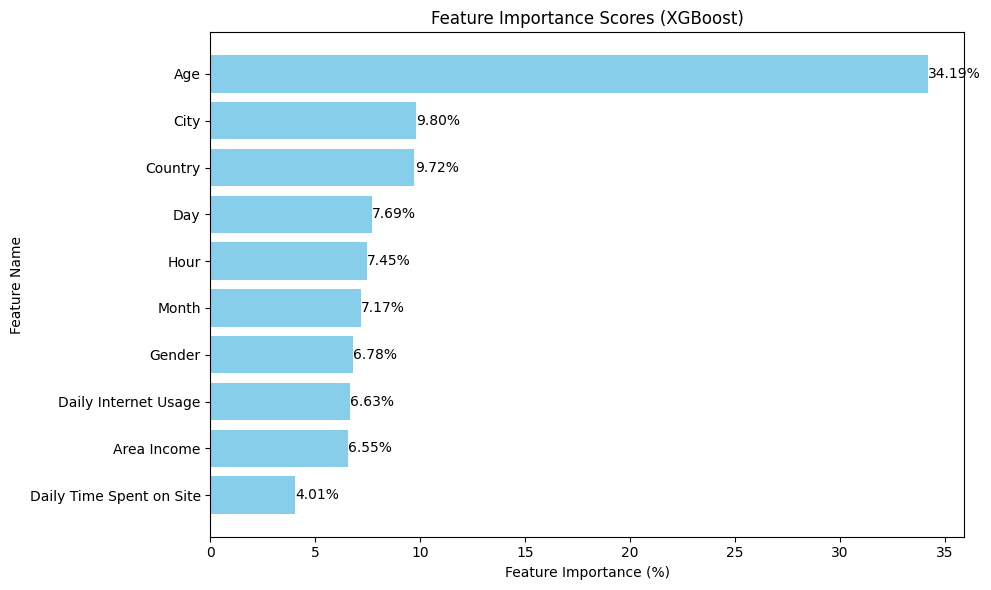

In [18]:
# Get and sort feature importances
feature_importances = clf_xgb.feature_importances_
feature_names = X_train.columns
total_importance = sum(feature_importances)  # Calculate total importance

# Calculate percentage importances
percentage_importances = (feature_importances / total_importance) * 100
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': percentage_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Create feature importance visualization with percentages
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Feature Importance (%)')
plt.ylabel('Feature Name')
plt.title('Feature Importance Scores (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top

# Add percentage labels on top of bars
for i, v in enumerate(feature_importance_df['importance']):
    plt.text(v + 0.02, i, f"{v:.2f}%", va='center')  # Adjust offset for better positioning

plt.tight_layout()
plt.show()

## LGBM Classifier


[LightGBM] [Info] Number of positive: 3931, number of negative: 4069
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1217
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491375 -> initscore=-0.034503
[LightGBM] [Info] Start training from score -0.034503

🔹 LightGBM Classifier Results 🔹
Accuracy: 0.871

Classification Report:
              precision    recall  f1-score   support
0              0.869863  0.876726  0.873281  1014.000
1              0.872188  0.865112  0.868635   986.000
accuracy       0.871000  0.871000  0.871000     0.871
macro avg      0.871026  0.870919  0.870958  2000.000
weighted avg   0.871009  0.871000  0.870991  2000.000

Confusion Matrix:
[[889 125]
 [133 853]]


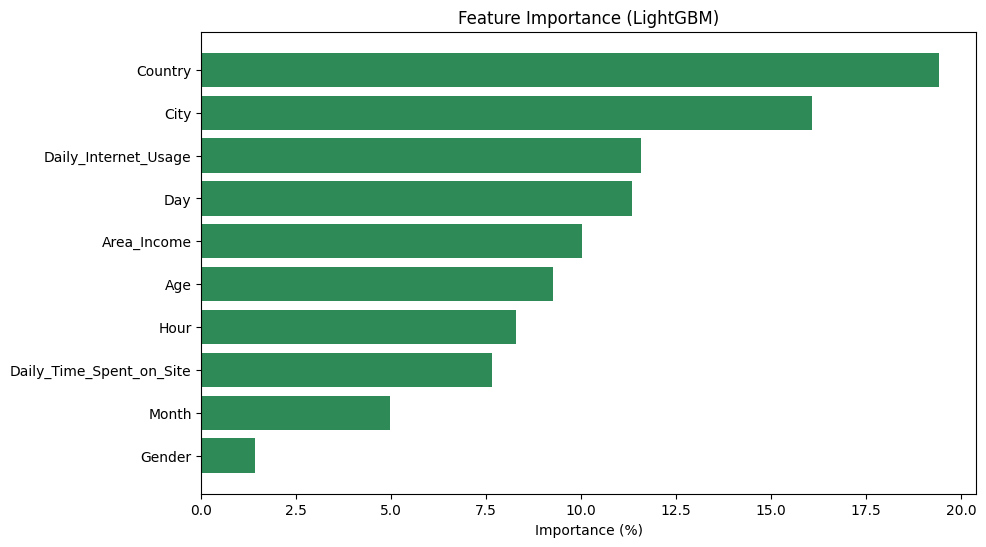

In [19]:
from lightgbm import LGBMClassifier

# FIX COLUMN NAMES FOR LIGHTGBM
X_lgbm = X.copy()
X_lgbm.columns = X_lgbm.columns.str.replace(" ", "_")

# Replace X with X_lgbm for LGBM model only
# Re-split after renaming columns
X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(
    X_lgbm, y, test_size=0.2, random_state=42
)

lgbm_model = LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
lgbm_model.fit(X_train_lgbm, y_train_lgbm)

# Predict
y_pred_lgbm = lgbm_model.predict(X_test_lgbm)

# Evaluate
print("\n🔹 LightGBM Classifier Results 🔹")
print("Accuracy:", round(accuracy_score(y_test_lgbm, y_pred_lgbm), 4))

# Classification report
lgbm_report = pd.DataFrame(classification_report(
    y_test_lgbm, y_pred_lgbm, output_dict=True)).transpose()
print("\nClassification Report:")
print(lgbm_report)

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_lgbm, y_pred_lgbm))

# FEATURE IMPORTANCE
feature_names = X_lgbm.columns

lgbm_importances = lgbm_model.feature_importances_
lgbm_importances = (lgbm_importances / sum(lgbm_importances)) * 100

lgbm_feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': lgbm_importances
}).sort_values(by='Importance (%)', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(lgbm_feat_df['Feature'], lgbm_feat_df['Importance (%)'], color='seagreen')
plt.gca().invert_yaxis()
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Importance (%)")
plt.show()


## Ada Boost Classifier


🔹 AdaBoost Classifier Results 🔹
Accuracy: 0.756

Classification Report:
              precision    recall  f1-score   support
0              0.725171  0.835306  0.776352  1014.000
1              0.799279  0.674442  0.731573   986.000
accuracy       0.756000  0.756000  0.756000     0.756
macro avg      0.762225  0.754874  0.753963  2000.000
weighted avg   0.761706  0.756000  0.754276  2000.000

Confusion Matrix:
[[847 167]
 [321 665]]


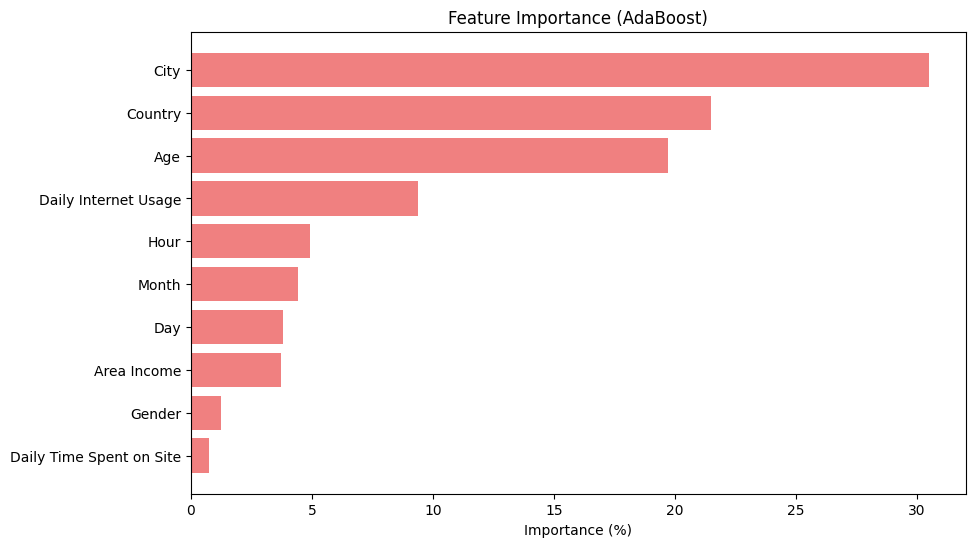

In [20]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predict on test set
y_pred_ada = ada_model.predict(X_test)

# Evaluate
print("\n🔹 AdaBoost Classifier Results 🔹")
print("Accuracy:", round(accuracy_score(y_test, y_pred_ada), 4))

# Classification report
ada_report = pd.DataFrame(classification_report(y_test, y_pred_ada, output_dict=True)).transpose()
print("\nClassification Report:")
print(ada_report)

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

# Feature Importance
ada_importances = ada_model.feature_importances_ * 100
ada_feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance (%)': ada_importances})
ada_feat_df = ada_feat_df.sort_values(by='Importance (%)', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(ada_feat_df['Feature'], ada_feat_df['Importance (%)'], color='lightcoral')
plt.gca().invert_yaxis()
plt.title("Feature Importance (AdaBoost)")
plt.xlabel("Importance (%)")
plt.show()


## Random Forest Classifier


🔹 Random Forest Classifier Results 🔹
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score  support
0              0.839354  0.870809  0.854792  1014.00
1              0.861814  0.828600  0.844881   986.00
accuracy       0.850000  0.850000  0.850000     0.85
macro avg      0.850584  0.849705  0.849836  2000.00
weighted avg   0.850427  0.850000  0.849906  2000.00

Confusion Matrix:
[[883 131]
 [169 817]]


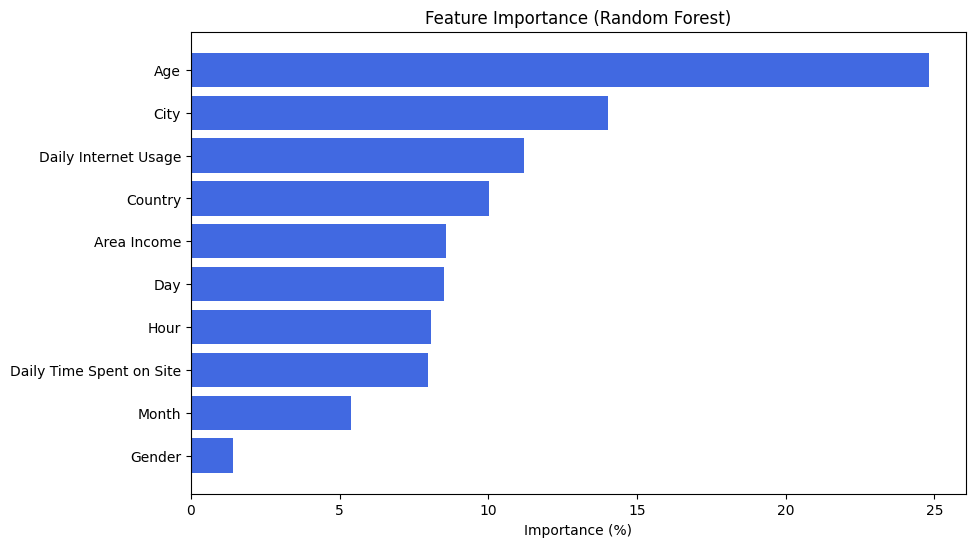

In [21]:

from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("\n🔹 Random Forest Classifier Results 🔹")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))

# Classification report
rf_report = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
print("\nClassification Report:")
print(rf_report)

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Feature Importance
rf_importances = rf_model.feature_importances_ * 100
rf_feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance (%)': rf_importances})
rf_feat_df = rf_feat_df.sort_values(by='Importance (%)', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(rf_feat_df['Feature'], rf_feat_df['Importance (%)'], color='royalblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance (%)")
plt.show()


## K-Fold Cross Validation for ML Models

In [22]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
import numpy as np
import pandas as pd

# Clean column names for LightGBM (avoid whitespace warning)
X_lgbm = X.copy()
X_lgbm.columns = X_lgbm.columns.str.replace(" ", "_")

# Define models (cleaned parameters)
models = {
    "XGBoost": xgb.XGBClassifier(
        n_estimators=100,
        random_state=42,
        eval_metric='logloss',   # Proper replacement for deprecated label encoder
        verbosity=0              # Suppress training logs
    ),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42,
        verbose=-1               # Turn off LightGBM info logs
    ),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

# Configure K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models
results = {}
for name, model in models.items():
    if name == "LightGBM":
        cv_scores = cross_val_score(model, X_lgbm, y, cv=kfold, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

    results[name] = {
        'Mean Accuracy': np.mean(cv_scores),
        'Std Deviation': np.std(cv_scores)
    }

    print(f"{name}: Mean Accuracy = {np.mean(cv_scores):.4f} | Std = {np.std(cv_scores):.4f}")

# Show results
results_df = pd.DataFrame(results).T.sort_values(by='Mean Accuracy', ascending=False)
print("\n K-Fold Cross Validation Results:")
print(results_df)


XGBoost: Mean Accuracy = 0.8671 | Std = 0.0098
AdaBoost: Mean Accuracy = 0.7609 | Std = 0.0059
LightGBM: Mean Accuracy = 0.8662 | Std = 0.0087
Random Forest: Mean Accuracy = 0.8434 | Std = 0.0069

 K-Fold Cross Validation Results:
               Mean Accuracy  Std Deviation
XGBoost               0.8671       0.009815
LightGBM              0.8662       0.008675
Random Forest         0.8434       0.006924
AdaBoost              0.7609       0.005877


## ROC–AUC Curve Comparison for the Models

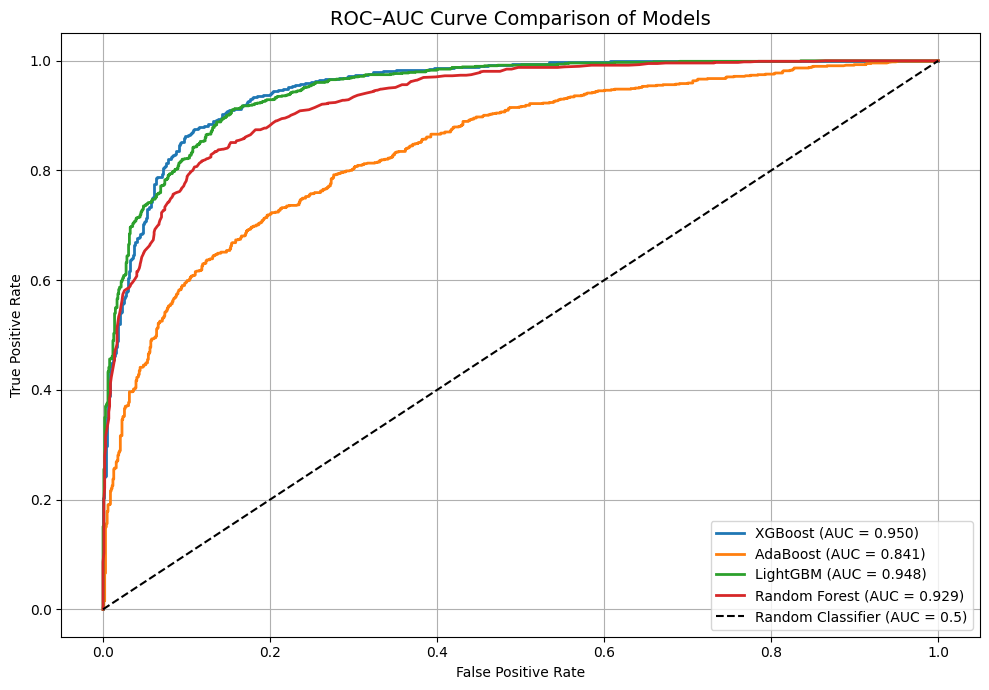


📊 ROC–AUC Scores for All Models:
           Model  ROC–AUC Score
0        XGBoost       0.949788
2       LightGBM       0.948194
3  Random Forest       0.928741
1       AdaBoost       0.840666


In [23]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="X does not have valid feature names")

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import models
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

# Clean feature names for LightGBM
X_lgbm = X_train.copy()
X_lgbm.columns = X_lgbm.columns.str.replace(" ", "_")
X_test_lgbm = X_test.copy()
X_test_lgbm.columns = X_test_lgbm.columns.str.replace(" ", "_")

# Define models (with quiet configurations)

models = {
    "XGBoost": xgb.XGBClassifier(
        n_estimators=100,
        random_state=42,
        eval_metric='logloss',
        verbosity=0,        # Suppress XGBoost logs
        n_jobs=-1
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=100,
        random_state=42
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42,
        verbose=-1,         # Turn off LightGBM logs
        force_col_wise=True # Avoid LightGBM thread warnings
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42
    )
}

# Plot ROC–AUC for all models
plt.figure(figsize=(10, 7))
roc_auc_scores = {}

for name, model in models.items():
    # Train
    if name == "LightGBM":
        model.fit(X_lgbm, y_train)
        y_prob = model.predict_proba(X_test_lgbm)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC metrics
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    roc_auc_scores[name] = auc_score
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_score:.3f})")

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Customize plot
plt.title('ROC–AUC Curve Comparison of Models', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 📊 Print AUC scores
# ----------------------------------------------------------
auc_df = pd.DataFrame(list(roc_auc_scores.items()), columns=['Model', 'ROC–AUC Score'])
auc_df = auc_df.sort_values(by='ROC–AUC Score', ascending=False)
print("\n📊 ROC–AUC Scores for All Models:")
print(auc_df)


## Saving Trained Models

In [24]:
# =============================================
# 📦 SAVE TRAINED MODELS FOR DASHBOARD USE
# =============================================
import pickle
import os

# Create a folder to store the models
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

# Save each trained model as a pickle file
models_to_save = {
    "xgboost": clf_xgb,
    "lightgbm": lgbm_model,
    "adaboost": ada_model,
    "random_forest": rf_model
}

for name, model in models_to_save.items():
    filename = os.path.join(model_dir, f"{name}.pkl")
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    print(f"✅ Saved: {filename}")

print("\nAll models saved successfully!")


✅ Saved: saved_models\xgboost.pkl
✅ Saved: saved_models\lightgbm.pkl
✅ Saved: saved_models\adaboost.pkl
✅ Saved: saved_models\random_forest.pkl

All models saved successfully!


Saving Model Performance

In [28]:
# ==========================================================
# 📦 SAVE MODEL PERFORMANCE (Mean Accuracy + ROC–AUC Scores)
# ==========================================================
import pandas as pd
import os

# Ensure DataFrames are properly formatted
# Convert index to column if needed
if 'Model' not in results_df.columns:
    results_df = results_df.reset_index().rename(columns={'index': 'Model'})

if 'Model' not in auc_df.columns:
    auc_df = auc_df.reset_index().rename(columns={'index': 'Model'})

# Merge on the 'Model' column
performance_df = pd.merge(results_df, auc_df, on='Model', how='outer')

# Reorder and clean columns
performance_df = performance_df.rename(columns={
    'Mean Accuracy': 'Mean Accuracy',
    'Std': 'Std Deviation',
    'ROC–AUC Score': 'ROC–AUC Score'
})

# Ensure all expected columns exist
for col in ['Mean Accuracy', 'Std Deviation', 'ROC–AUC Score']:
    if col not in performance_df.columns:
        performance_df[col] = np.nan

performance_df = performance_df[['Model', 'Mean Accuracy', 'Std Deviation', 'ROC–AUC Score']]

# Save to folder
os.makedirs('saved_models', exist_ok=True)
performance_df.to_csv('saved_models/model_performance.csv', index=False)

print("\n✅ Model performance saved successfully to 'saved_models/model_performance.csv'")
display(performance_df)



✅ Model performance saved successfully to 'saved_models/model_performance.csv'


,Model,Mean Accuracy,Std Deviation,ROC–AUC Score
0,AdaBoost,0.7609,0.005877,0.840666
1,LightGBM,0.8662,0.008675,0.948194
2,Random Forest,0.8434,0.006924,0.928741
3,XGBoost,0.8671,0.009815,0.949788


Saving ROC Curve Data

In [29]:
# ==========================================================
# 📦 Save Training Feature Names and ROC Curve Data
# ==========================================================
import numpy as np
import os

# 1️⃣ Save the feature list used during training
train_features = list(X_train.columns)
os.makedirs("saved_models", exist_ok=True)
with open("saved_models/train_features.txt", "w") as f:
    for feat in train_features:
        f.write(f"{feat}\n")
print("✅ Saved training feature names to 'saved_models/train_features.txt'")

# 2️⃣ Save ROC curve data for dashboard visualization
# (Assuming you computed fpr, tpr, auc_score for each model in your ROC section)
roc_data = {}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    roc_data[name] = {"fpr": fpr, "tpr": tpr, "auc": auc_score}

np.savez("saved_models/roc_data.npz", **roc_data)
print("✅ Saved ROC curve data to 'saved_models/roc_data.npz'")


✅ Saved training feature names to 'saved_models/train_features.txt'
✅ Saved ROC curve data to 'saved_models/roc_data.npz'


Saving Precision-Recall and Confusion Matrices

In [30]:
# ==========================================================
# 📦 Save Precision–Recall Data and Confusion Matrices
# ==========================================================
from sklearn.metrics import precision_recall_curve, confusion_matrix, precision_score, recall_score
import numpy as np
import os
import pickle

pr_data = {}
cm_data = {}

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    # Precision–Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_data[name] = {"precision": precision, "recall": recall}

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    pr_val = precision_score(y_test, y_pred)
    rc_val = recall_score(y_test, y_pred)
    cm_data[name] = {"matrix": cm, "precision": pr_val, "recall": rc_val}

# Save both
os.makedirs("saved_models", exist_ok=True)
np.savez("saved_models/pr_data.npz", **pr_data)
with open("saved_models/confusion_data.pkl", "wb") as f:
    pickle.dump(cm_data, f)

print("✅ Saved precision–recall and confusion matrix data.")


✅ Saved precision–recall and confusion matrix data.


## Generating Synthetic Data

In [25]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import make_classification

# # ---- Step 1: Load Original Data ----
# original_df = pd.read_csv(r"C:\Users\Administrator\Desktop\CTR_Project\data\ad_records.csv")  # or wherever your data is
# print("Original data shape:", original_df.shape)

# # ---- Step 2: Define target column manually ----
# target_col = "Clicked on Ad"  # ✅ set explicitly

# if target_col not in original_df.columns:
#     raise ValueError(f"Target column '{target_col}' not found in dataset! Available columns: {original_df.columns.tolist()}")

# print(f"✅ Target column confirmed: {target_col}")


# # ---- Step 3: Create Synthetic Data ----
# # You can control number of synthetic samples here.
# n_samples = 10000

# # Create synthetic data roughly similar to your original
# num_cols = original_df.select_dtypes(include=[np.number]).columns.tolist()
# cat_cols = original_df.select_dtypes(exclude=[np.number]).columns.tolist()

# synthetic_data = pd.DataFrame()

# # For numeric columns — sample from normal distribution based on original stats
# for col in num_cols:
#     mean, std = original_df[col].mean(), original_df[col].std()
#     std = std if std > 0 else 1e-6  # avoid zero std
#     synthetic_data[col] = np.random.normal(mean, std, n_samples)

# # For categorical columns — sample based on observed frequencies
# for col in cat_cols:
#     probs = original_df[col].value_counts(normalize=True)
#     synthetic_data[col] = np.random.choice(probs.index, size=n_samples, p=probs.values)

# # ---- Step 4: Assign Target Values to Synthetic Data ----
# # Convert target column to numeric (0/1) if categorical
# if original_df[target_col].dtype == "object" or not np.issubdtype(original_df[target_col].dtype, np.number):
#     unique_vals = original_df[target_col].dropna().unique()
#     if len(unique_vals) == 2:
#         # Map first value to 0, second to 1
#         mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
#         original_df[target_col] = original_df[target_col].map(mapping)
#     else:
#         # If not binary, default to 0.5 ratio
#         original_df[target_col] = np.random.choice([0, 1], size=len(original_df))

# # Compute target ratio safely
# target_ratio = float(original_df[target_col].mean())
# synthetic_data[target_col] = np.random.choice(
#     [0, 1],
#     size=n_samples,
#     p=[1 - target_ratio, target_ratio]
# )


# # ---- Step 5: Combine Original + Synthetic ----
# combined_df = pd.concat([original_df, synthetic_data], ignore_index=True)
# print("Combined dataset shape:", combined_df.shape)

# # ---- Step 6: Save Combined Dataset ----
# combined_df.to_csv("data/combined_dataset.csv", index=False)
# print("✅ Combined dataset saved as 'combined_dataset.csv'")


## Generating Synthetic Data Using Faker

In [26]:
# import numpy as np
# import pandas as pd
# from faker import Faker

# # ---- Step 1: Load Original Data ----
# original_df = pd.read_csv(r"C:\Users\Administrator\Desktop\CTR_Project\data\ad_records.csv")
# print("Original data shape:", original_df.shape)

# # ---- Step 2: Define target column manually ----
# target_col = "Clicked on Ad"  # ✅ Explicit target column

# if target_col not in original_df.columns:
#     raise ValueError(f"Target column '{target_col}' not found in dataset! Available: {original_df.columns.tolist()}")

# print(f"✅ Target column confirmed: {target_col}")

# # ---- Step 3: Initialize Faker ----
# fake = Faker()
# n_samples = 10000  # Number of synthetic samples to generate

# # ---- Step 4: Detect column types ----
# num_cols = original_df.select_dtypes(include=[np.number]).columns.tolist()
# cat_cols = original_df.select_dtypes(exclude=[np.number]).columns.tolist()

# # ---- Step 5: Convert target to numeric if necessary ----
# if original_df[target_col].dtype == "object" or not np.issubdtype(original_df[target_col].dtype, np.number):
#     unique_vals = original_df[target_col].dropna().unique()
#     if len(unique_vals) == 2:
#         mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
#         original_df[target_col] = original_df[target_col].map(mapping)
#     else:
#         original_df[target_col] = np.random.choice([0, 1], size=len(original_df))

# # ---- Step 6: Compute target ratio ----
# target_ratio = float(original_df[target_col].mean())

# # ---- Step 7: Generate Synthetic Data ----
# synthetic_data = pd.DataFrame()

# for col in num_cols:
#     mean, std = original_df[col].mean(), original_df[col].std()
#     std = std if std > 0 else 1e-6
#     synthetic_data[col] = np.random.normal(mean, std, n_samples)

# # Use Faker for non-numeric columns
# for col in cat_cols:
#     if "city" in col.lower():
#         synthetic_data[col] = [fake.city() for _ in range(n_samples)]
#     elif "country" in col.lower():
#         synthetic_data[col] = [fake.country() for _ in range(n_samples)]
#     elif "timestamp" in col.lower() or "date" in col.lower() or "time" in col.lower():
#         synthetic_data[col] = [fake.date_time_this_decade() for _ in range(n_samples)]
#     elif "ad" in col.lower() or "topic" in col.lower() or "headline" in col.lower():
#         synthetic_data[col] = [fake.catch_phrase() for _ in range(n_samples)]
#     elif "gender" in col.lower():
#         synthetic_data[col] = [fake.random_element(elements=["Male", "Female"]) for _ in range(n_samples)]
#     else:
#         # fallback: sample from original distribution
#         probs = original_df[col].value_counts(normalize=True)
#         synthetic_data[col] = np.random.choice(probs.index, size=n_samples, p=probs.values)

# # ---- Step 8: Assign Target Values ----
# synthetic_data[target_col] = np.random.choice(
#     [0, 1], size=n_samples, p=[1 - target_ratio, target_ratio]
# )

# # ---- Step 9: Combine Datasets ----
# combined_df = pd.concat([original_df, synthetic_data], ignore_index=True)
# print("✅ Combined dataset shape:", combined_df.shape)

# # ---- Step 10: Save Combined Dataset ----
# combined_df.to_csv(r"C:\Users\Administrator\Desktop\CTR_Project\data\combined_dataset_f.csv", index=False)
# print("✅ Combined dataset saved as 'combined_dataset.csv'")
